<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management, Analysis and Security</h1>

<h2 align='center'> Lab 04 - Statistical Methods and Hypothesis Testing</h2>

*****

In this lab, we'll go through some Statistical and Research methods taught in the lectures. Statistics is a major component of data analysis. It allows you to investigate data and make inferences based on your observations. A foundation in statistics also allows you to be a consumer of analyses that others perform, and allows you to relate to the conclusions others have drawn from their investigations.

*****

<h3 align='center'> Exercise 1 - Determining Optimal Chopstick Length</h3>

_This exercise was extracted from this [1991 study](http://www.ncbi.nlm.nih.gov/pubmed/15676839) (Old? IKR! Not as old as Lab 1's Josephus Problem though!!)_.

Chopsticks are one of the most simple and popular hand tools ever invented by humans, but have not previously been investigated by ergonomists. A research was conducted in 1991, to evaluate the effects of the length of the chopsticks on the food-serving performance of adults and children. Thirty-one male junior college students and 21 primary school pupils served as subjects for the experiment to test chopsticks lengths of 180, 210, 240, 270, 300, and 330 mm. The results showed that the food-pinching performance was significantly affected by the length of the chopsticks, and that chopsticks of about 240 and 180 mm long were optimal for adults and pupils, respectively. Based on these findings, the researchers suggested that families with children should provide both 240 and 180 mm long chopsticks. In addition, restaurants could provide 210 mm long chopsticks, considering the trade-offs between ergonomics and cost.

For this exercise, we are only going to work with the chopstick dataset for adults, which has the data relating to the chopstick efficiency of 31 adult college students. So, let's see if we can replicate the results of the study and reach similar conclusions with our own analysis!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [17]:
# Task 1 - Use this cell to import the given CSV into a dataframe and explore the data. 
ce = pd.read_csv('chopstick-effectiveness.csv')
sr = pd.read_csv('stroop-results.csv')

,Food.Pinching.Efficiency,Individual,Chopstick.Length
0,19.55,1,180
1,27.24,2,180
2,28.76,3,180
3,31.19,4,180
4,21.91,5,180


So, here we can see two types of variables in the dataset. An **independent variable** and a **dependent variable**. 

* **Chopstick.Length** - Refers to the length of the chopstick used by the individual (in mm). It is an **independent variable**.

* **Food.Pinching.Efficiency** - Is defined as the number of peanuts picked and placed in a cup (PPPC) with the said length of chopstick. It is therefore a **dependent variable** in this study.   

<u><b>Task 2</b></u> - **Based on this experiment decription and other information provided above, can you point out any _two_ controlled variables in this experiment?** 

_(Controlled variables are values that remain the same throughout the course of an experiment, and is not of primary concern to the experiment outcome)_

In [3]:
## YOUR ANSWER HERE
# controlled variable: number of college students, the material that the chopsticks are made from



In [4]:
# Task 3 - Clean the dataframe (OPTIONAL). 
# (i)  One of the columns here looks expendable. Remove that column
# (ii) The independent variable should be the first column in a dataframe, followed by the dependent variable(s).
ce = ce.drop(labels = 'Individual', axis = 1)
ce.columns = ['performance', 'length']
cols = ce.columns.tolist() 
# cols = cols[-1: ]+ cols[:-1]
cols = cols[::-1]
ce = ce[cols]
ce.head()
# YOUR ANSWER HERE



,length,performance
0,180,19.55
1,180,27.24
2,180,28.76
3,180,31.19
4,180,21.91


In [11]:
# Task 4 - Group the observations by Chopstick Length and find out 
# the mean Pinching Efficiency for each chopstick length
ce_1  = ce.groupby('length')['performance'].mean()
ce_1
# YOUR ANSWER HERE



length
180    24.935161
210    25.483871
240    26.322903
270    24.323871
300    24.968065
330    23.999677
Name: performance, dtype: float64

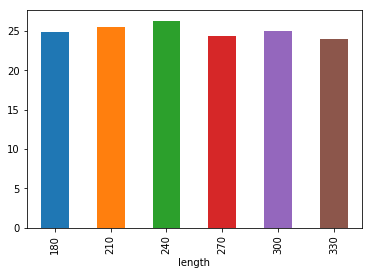

In [12]:
# Task 5 - Plot a graph to visualise the relationship between Chopstick Length and Average Pinching Efficiency

ce_1.plot(kind = 'bar')


# YOUR ANSWER HERE




Based on your graph above, what correlation can you see between **Chopstick Length** and **Food Pinching Efficiency**? 

In [7]:
# Task 6 - Correlation between Chopstick Length and Food Pinching Efficiency
# Food Pinching Efficiency increases along with length from 180 to 240, and somehow decrease after 240.
# YOUR ANSWER HERE




### So, according to the above study which chopstick length performed the best for the group of thirty-one male junior college students? Do you agree with the claims of the given study?

In [8]:
# Task 7 - Conclusion
240
# YOUR ANSWER HERE




<h3 align='center'> Exercise 2 - Stroop Test</h3>

In a **Stroop Test**, a participant is presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: 

(a) A **congruent words condition**, where the words being displayed are color words whose names match the colors in which they are printed: for example <span style='color:red;'><b>RED</b></span>, <span style='color:blue;'><b>BLUE</b></span>. 

(b) An **incongruent words condition**, where the words displayed are color words whose names do not match the colors in which they are printed: for example <span style='color:orange;'><b>PURPLE</b></span>, <span style='color:lightgreen;'><b>ORANGE</b></span>. 

_You can perform the Stroop Test yourself and compare your results with this dataset. This will also help you form a basis of your initial hypothesis for this experiment. Go to this link to try the [Stroop Test](https://faculty.washington.edu/chudler/java/ready.html)_.

In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

For such a test, 


### 1. What is our independent variable? What is our dependent variable?

In [9]:
# Task 1 - Independent & Dependent Variables
# YOUR ANSWER HERE
# independent variables are words conditions
# dependent variable is time



### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

In [19]:
# Task 2 - Hypotheses and Statistical Tests
# YOUR ANSWER HERE
# If the color the word is written in matches the word, it will be identified more quickly than if the color the word is written in is contradictory.        
# A repeated measures design as each of the participants will take part in all conditions of the independent variable (Appendix D).
# 20 people, 10 male and 10 female between the ages 16-60 from a Surrey Sixth form using an opportunity sample (Appendix E). The sample was approached in and around the sixth form block, including the common room, study room and sixth form canteen.




### 3. Explore the given dataset of results for 25 participants performing the Stroop Test in Congruent and Incongruent conditions. Run some descriptive statistics on the dataset, including a measure of central tendency and a measure of variability. 

In [28]:
# Task 3 - Descriptive Statistics
# EXPLORE THE GIVEN DATASET
# YOUR ANSWER HERE
sr_test = sr.head(25)
sr_test

,Congruent,Incongruent
0,12.490,19.278
1,14.669,22.803
2,12.238,20.878
3,18.200,35.255
4,22.328,24.524
5,14.692,24.572
6,16.004,21.157
7,16.791,18.741
8,9.564,21.214
9,8.630,15.687


In [29]:
# MEASURE OF CENTRAL TENDENCY
# YOUR ANSWER HERE
sr.describe()



,Congruent,Incongruent
count,24.000000,24.000000
mean,14.068250,22.015917
std,3.550435,4.797057
min,8.630000,15.687000
25%,11.933500,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [30]:
# MEASURE OF VARIABILITY
# YOUR ANSWER HERE
sr.var()



Congruent      12.605585
Incongruent    23.011757
dtype: float64

### 4. Provide a visualization that shows the distribution of the data in this dataset and compares the readings of the Congruent and Incongruent Conditions

([<matplotlib.axis.XTick at 0x1a23301470>,
 <a list of 2 Text xticklabel objects>)

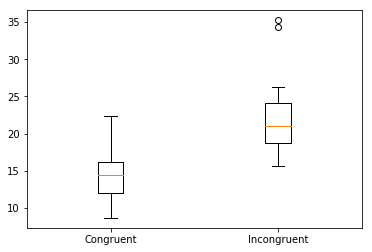

In [37]:
# Task 4 - Visualization
# YOUR ANSWER HERE
x = sr_test.Congruent
y = sr_test.Incongruent
plt.boxplot([x,y])
plt.xticks([1,2], ['Congruent', 'Incongruent'])


### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis? What conclusion can you draw from the experiment task. 

In [38]:
# Task 5 - Statistical Tests
# YOUR ANSWER HERE
st.ttest_rel(x,y)



Ttest_relResult(statistic=-7.997650224943587, pvalue=4.310862414515775e-08)

In [ ]:
# As the p value is much lower than 0.05 we reject the null hypothesis and conclude that If the color the word is written in matches the word, it will be identified more quickly than if the color the word is written in is contradictory.  